<a href="https://colab.research.google.com/github/maseerab/predictive/blob/main/houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded — shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🏆 Best params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.9}

📊 Final Metrics
R²  : 0.646
MAE : ₹958,867
RMSE: ₹1,337,565


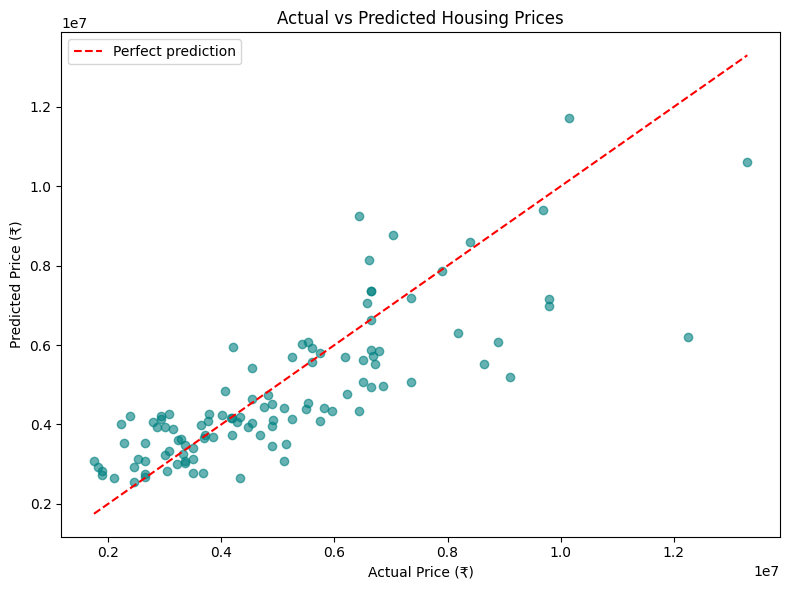

,Actual Price (₹),Predicted Price (₹)
0,4060000.0,4846906.0
1,6650000.0,7351319.0
2,3710000.0,3730924.5
3,6440000.0,4348846.5
4,2800000.0,4068690.5
5,4900000.0,3463484.5
6,5250000.0,5707070.5
7,4543000.0,5414787.0
8,2450000.0,2936574.5
9,3353000.0,3018413.5


In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
import joblib

# Path to the uploaded dataset
df = pd.read_csv("Housing.csv")
print("✅ Dataset loaded — shape:", df.shape)
display(df.head())
df["price_log"] = np.log1p(df["price"])   # log(1 + price) smooths skew
X = df.drop(["price", "price_log"], axis=1)
y = df["price_log"]

# Identify column types
num_cols = X.select_dtypes(["int64", "float64"]).columns
cat_cols = X.select_dtypes(["object"]).columns

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), cat_cols)
])1
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("xgb",  xgb)
])

param_grid = {
    "xgb__n_estimators":      [300, 500],
    "xgb__learning_rate":     [0.05, 0.1],
    "xgb__max_depth":         [3, 4],
    "xgb__subsample":         [0.9],
    "xgb__colsample_bytree":  [0.8, 1.0]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("🏆 Best params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred     = np.expm1(y_pred_log)   # undo log1p
y_actual   = np.expm1(y_test)

r2   = r2_score(y_actual, y_pred)
mae  = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

print("\n📊 Final Metrics")
print(f"R²  : {r2:.3f}")
print(f"MAE : ₹{mae:,.0f}")
print(f"RMSE: ₹{rmse:,.0f}")

plt.figure(figsize=(8,6))
plt.scatter(y_actual, y_pred, alpha=0.6, color="teal")
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         "r--", label="Perfect prediction")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.tight_layout()
plt.show()
comparison = pd.DataFrame({
    "Actual Price (₹)":    y_actual.values,
    "Predicted Price (₹)": y_pred
}).reset_index(drop=True).head(10).round(2)

display(comparison)

✅ Dataset Loaded — Shape: (545, 13)
Numerical columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

📊 Model Evaluation:
R² Score: 0.653
MAE     : ₹970,043
RMSE    : ₹1,324,507


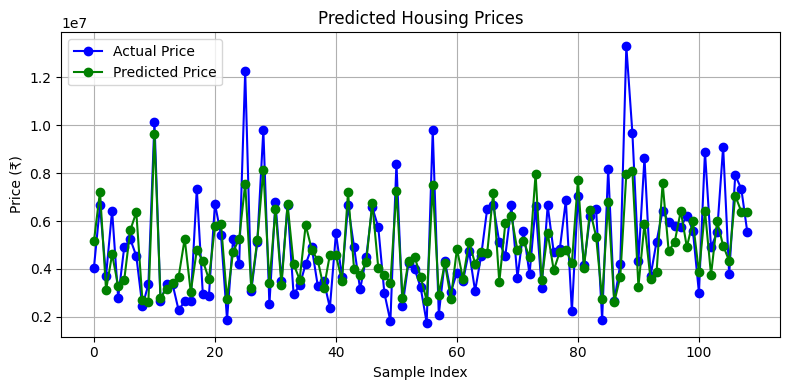

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
df = pd.read_csv("Housing.csv")
print("✅ Dataset Loaded — Shape:", df.shape)
df.head()
X = df.drop("price", axis=1)
y = df["price"]
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), cat_cols)
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\n Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE     : ₹{mae:,.0f}")
print(f"RMSE    : ₹{rmse:,.0f}")
plt.figure(figsize=(8,4))
plt.plot(range(len(y_test)), y_test.values, 'bo-', label='Actual Price')
plt.title("Actual Housing Prices")
plt.plot(range(len(y_pred)), y_pred, 'go-', label='Predicted Price')
plt.title("Predicted Housing Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
